In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("medical_cost.csv")
df

,Id,age,sex,bmi,children,smoker,region,charges
0,1,19,female,27.900,0,yes,southwest,16884.92400
1,2,18,male,33.770,1,no,southeast,1725.55230
2,3,28,male,33.000,3,no,southeast,4449.46200
3,4,33,male,22.705,0,no,northwest,21984.47061
4,5,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...,...
1333,1334,50,male,30.970,3,no,northwest,10600.54830
1334,1335,18,female,31.920,0,no,northeast,2205.98080
1335,1336,18,female,36.850,0,no,southeast,1629.83350
1336,1337,21,female,25.800,0,no,southwest,2007.94500


In [19]:
#Chargement et aperçu du dataset

df = pd.read_csv("medical_cost.csv")

df.shape
#Renvoie un tuple représentant les dimensions du DataFrame
#En sortie on observe les informations sur la forme: (nombre_de_lignes, nombre_de_colonnes)

df.info()
#Affiche un résumé concis du DataFrame.
#Inclut le type d'index et les colonnes, le nombre de valeurs non nulles et leurs types, ainsi que l'utilisation de la mémoire.

df.describe()
#Génère des statistiques descriptives pour les colonnes numériques du DataFrame.
#En sortie on obseve les informations sur: le compte, la moyenne, l'écart type, le minimum, le 25ème percentile, la médiane (50ème percentile), le 75ème percentile et les valeurs maximales pour chaque colonne numérique

df.columns
#Renvoie les étiquettes (noms) des colonnes du DataFrame.
#En sortie on observe : Un objet Index contenant les noms de toutes les colonnes.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Id        1338 non-null   int64  
 1   age       1338 non-null   int64  
 2   sex       1338 non-null   object 
 3   bmi       1338 non-null   float64
 4   children  1338 non-null   int64  
 5   smoker    1338 non-null   object 
 6   region    1338 non-null   object 
 7   charges   1338 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 83.8+ KB


Index(['Id', 'age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [20]:
#Nettoyage des données

In [21]:
df.isnull().sum()
#Le code df.isnull().sum() compte le nombre de valeurs manquantes dans chaque colonne de votre DataFrame df.
#Le résultat 0 pour chaque colonne signifie que votre DataFrame ne contient aucune valeur manquante.

Id          0
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [22]:
df=pd.read_csv('medical_cost.csv')

has_duplicates = df.duplicated().any()
print("Présence de doublons :", has_duplicates)

#Le code df.duplicated().any() vérifie si le DataFrame df contient au moins une ligne entièrement dupliquée.
#Le résultat affiché, Présence de doublons : True ou Présence de doublons : False, indique s'il y a (True) ou non (False) des doublons de lignes complètes dans vos données

#La sortie Présence de doublons : False signifie que le code a vérifié le fichier medical_cost.csv et n'a trouvé aucune ligne entièrement dupliquée dans les données

Présence de doublons : False



## 📊 15 questions d’analyse de données (version enrichie)

1. **Quel est le nombre total de patients et quelles sont les caractéristiques principales du dataset ?**
2. **Quel est l’âge moyen des patients ?**
3. **Quelle est sa distribution ? (histogramme)**
4. **Quelle est la répartition des charges médicales ? (histogramme + boîte à moustaches)**
5. **Y a-t-il une corrélation entre l’âge et les charges médicales ? (nuage de points)**
6. **Les fumeurs paient-ils significativement plus ? (boxplot + moyenne)**
7. **Le sexe influence-t-il les charges ? (groupby + boxplot)**
8. **La région a-t-elle un impact sur les charges ? (groupby + ANOVA éventuelle)**
9. **Le nombre d’enfants influe-t-il sur les charges ? (analyse par groupe + boxplot)**
10. **Quel est l’effet de l’indice de masse corporelle (IMC) sur les charges ?**
11. **Les personnes obèses (IMC > 30) ont-elles des frais plus élevés ?**
12. **Quelles sont les variables les plus corrélées avec les charges ? (matrice de corrélation)**
13. **Existe-t-il des outliers dans les charges ? Qui sont-ils ?**
14. **Peut-on prédire les charges médicales avec un modèle de régression linéaire ?**
15. **Quelle est la performance du modèle prédictif ? (R², RMSE)**
16. **Quels profils de patients génèrent les plus fortes charges ? (filtrage + visualisation)**


In [24]:
# **Quel est le nombre total de patients et quelles sont les caractéristiques principales du dataset ?**
df = pd.read_csv("medical_cost.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Id        1338 non-null   int64  
 1   age       1338 non-null   int64  
 2   sex       1338 non-null   object 
 3   bmi       1338 non-null   float64
 4   children  1338 non-null   int64  
 5   smoker    1338 non-null   object 
 6   region    1338 non-null   object 
 7   charges   1338 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 83.8+ KB


#**interpretation Résultat obtenus :**
    
Nombre de patients total de patients: 1338

Nombre de colonnes : 8

Colonnes :
Id : identifiant unique
age : âge du patient (int)
sex : sexe (homme/femme)
bmi : indice de masse corporelle (float)
children : nombre d’enfants à charge (int)
smoker : fumeur ou non (object)
region : région géographique (object)
charges : frais médicaux (float)

In [25]:
2. #**Quel est l’âge moyen des patients ?**
df = pd.read_csv("medical_cost.csv")
df["age"].mean()

39.20702541106129

#**interpretation Résultat obtenus :**
Âge moyen des patients : ≈ 39.21 ans
La population étudiée est relativement adulte, avec une moyenne d'âge d’environ 39 ans. 
    Cela nous donne une idée générale du profil d’âge des patients, ce qui peut influencer les charges médicales (notamment avec l’âge avancé).

In [ ]:
#**Quelle est sa distribution ? (histogramme)**


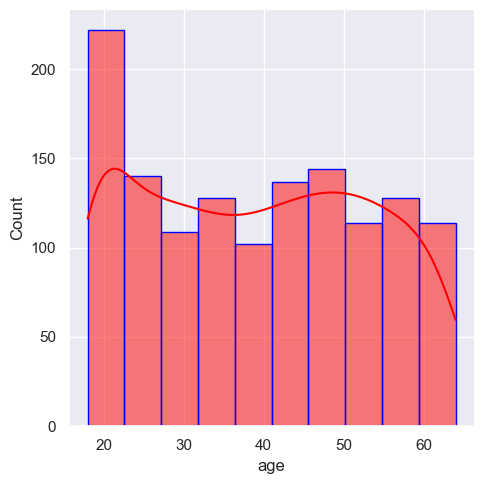

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('medical_cost.csv')
sns.set(style='darkgrid')
diagramme=sns.displot(x='age',data=df,bins=10,color='red',edgecolor='blue',kde='true')
#colors permet de donner la couleur du diagramme
#edgecolors permet de donner la couleur des bord de bande
#KDE (Kernel Density Estimation) sert à lisser la distribution des données pour montrer sa forme générale sous forme de courbe continue, par opposition aux barres d'un histogramme.
diagramme
plt.show()

#**interpretation Résultat obtenus :**

Le code crée un **histogramme stylisé de l'âge**
. Le résultat montre que **la majorité des individus sont jeunes(autour de 20 ans)**.

Ce graphique montre la répartition des âges.
Il y a un pic important chez les plus jeunes (autour de 20 ans). Les autres âges sont présents, mais moins nombreux que les plus jeunes dans cet ensemble de données.

**Quelle est la répartition des charges médicales ? (histogramme + boîte à moustaches)**

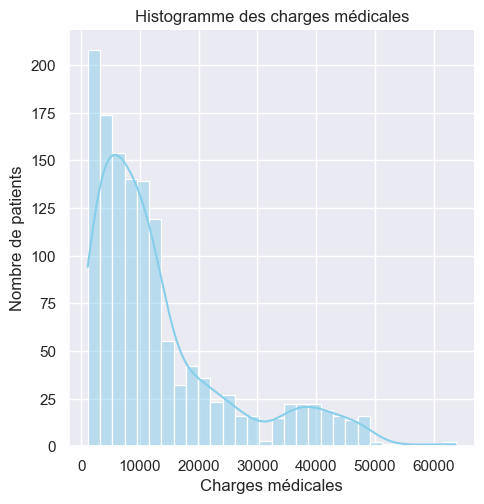

In [17]:
sns.displot(data=df, x='charges', bins=30, kde=True, color='skyblue')
plt.title('Histogramme des charges médicales')
plt.xlabel('Charges médicales')
plt.ylabel('Nombre de patients')
plt.show()

#**interpretation Résultat obtenus :**

Le graphique montre que :

1.  La plupart des gens ont des **charges médicales pas chères** (souvent entre 0 et 15 000).
2.  Le dessin du graphique est **penché à droite** parce que quelques personnes ont des **coûts médicaux très très hauts**.
3.  Donc, le **nombre de patients diminue vite** quand les charges montent.

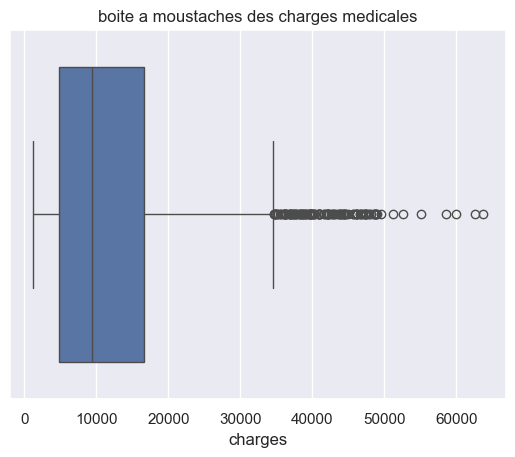

In [18]:
boxplot=sns.boxplot(data=df,x='charges')
boxplot.set_title('boite a moustaches des charges medicales')

plt.show()

#**interpretation Résultat obtenus :**

Le graphique montre que :

La ligne du milieu (la médiane) est basse, ça veut dire que **plus de la moitié des gens paient peu.**
Les nombreux points tout seuls à droite (les outliers) montrent qu'**il y a des patients avec des coûts beaucoup plus hauts que les autres**.
Et la boîte est large, ça montre que les **coûts changent pas mal même pour la moitié des patients au milieu, il y a une bonne variation dans les coûts**.

**Pour résumer les analyses faites à partir des graphiques :**

1.  Il semble y avoir une **corrélation positive entre l'âge et les charges médicales** : plus on est âgé, plus les charges ont tendance à être élevées.
2.  La répartition des **âges** montre qu'il y a **plus de jeunes** dans votre ensemble de données.
3.  La répartition des **charges médicales** est très déséquilibrée : la **majorité des patients ont des coûts bas**, mais une **petite partie a des charges très très hautes** (des outliers).

**Y a-t-il une corrélation entre l’âge et les charges médicales ? (nuage de points)**

#pour ce cas nous allons proceder par 2 manieres: Etude de la correlation entre les variables et par l'utilisation des nuages de point


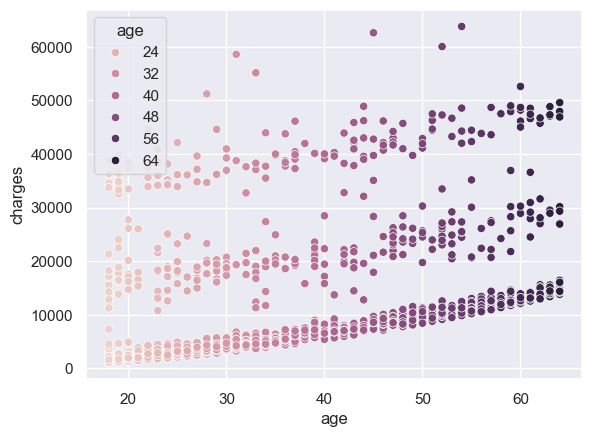

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('medical_cost.csv')
diagramme=sns.scatterplot(x='age',y='charges',data=df,hue='age')
#hue permet de creer une legende automatiquement en fonction de la categorie age
diagramme
plt.show()

#**interpretation Résultat obtenus :**

D'après le graphique, les charges médicales augmentent généralement avec l'âge.
Oui, il y a une corrélation positive entre l'âge et les charges médicales.

In [25]:
df=pd.read_csv('medical_cost.csv')
df['sex']=df['sex'].replace(['female','male'],value=['0','1']).astype(int)
df['region']=df['region'].replace(['southeast', 'northwest', 'southwest', 'northeast'], [0, 1, 2, 3]).astype(int)
df['smoker']=df['smoker'].replace(['no','yes'],value=['0','1']).astype(int)
df.corr()

C:\Users\DataVault\AppData\Local\Temp\ipykernel_7940\345023031.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['region']=df['region'].replace(['southeast', 'northwest', 'southwest', 'northeast'], [0, 1, 2, 3]).astype(int)


,Id,age,sex,bmi,children,smoker,region,charges
Id,1.000000,-0.031467,0.003704,-0.036169,0.025221,0.005217,0.008248,-0.003373
age,-0.031467,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.010265,0.299008
sex,0.003704,-0.020856,1.000000,0.046371,0.017163,0.076185,-0.010170,0.057292
bmi,-0.036169,0.109272,0.046371,1.000000,0.012759,0.003750,-0.213489,0.198341
children,0.025221,0.042469,0.017163,0.012759,1.000000,0.007673,0.000107,0.067998
smoker,0.005217,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.038873,0.787251
region,0.008248,0.010265,-0.010170,-0.213489,0.000107,-0.038873,1.000000,-0.040728
charges,-0.003373,0.299008,0.057292,0.198341,0.067998,0.787251,-0.040728,1.000000


#**interpretation Résultat obtenus :**

Le tabagisme (smoker) a la **relation linéaire la plus forte (positive) avec les coûts médicaux (charges)**.
**L'âge a une relation positive modérée avec les coûts**.
**Le BMI a une faible relation positive avec les coûts.**
Le sexe, le nombre denfants et la région montrent une très faible relation linéaire avec les coûts médicaux dans ces données.


**Les fumeurs paient-ils significativement plus ? (boxplot + moyenne)**

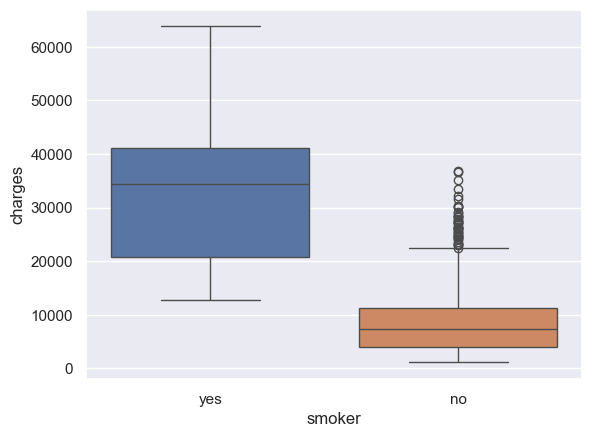

In [48]:
df=pd.read_csv('medical_cost.csv')
sns.boxplot(data=df,x='smoker',y='charges',hue='smoker')
plt.show()

#**interpretation Résultat obtenus :**

En résumé de ce dernier graphique, les fumeurs ont des charges médicales beaucoup plus élevées que les non-fumeurs.

**Le sexe influence-t-il les charges ? (groupby + boxplot)**

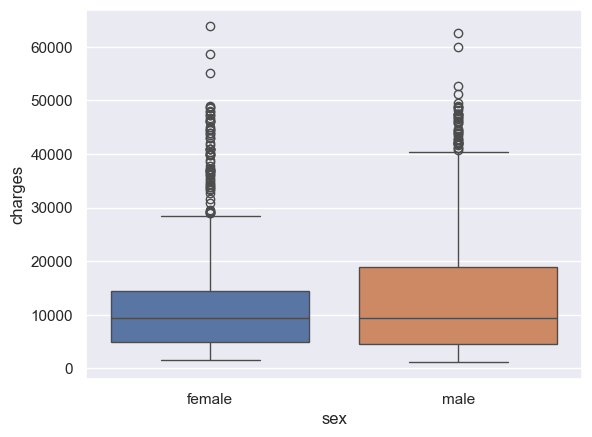

In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('medical_cost.csv')
sns.boxplot(data=df, x='sex', y='charges',hue='sex')

plt.show()

#**interpretation Résultat obtenus :**

En résumé :
* Les charges médicales sont **globalement assez similaires** entre les femmes et les hommes.
* On voit une petite tendance où les **hommes ont des charges un peu plus hautes** en moyenne (la ligne du milieu de la boîte).
* Cependant, les **très grosses charges** (les points tout seuls ou outliers) **existent de la même façon** chez les femmes et chez les hommes.

  **Oui, on peut dire que le sexe a une légère influence : les hommes ont tendance à avoir des charges un peu plus hautes que les femmes dans ces données, mais la différence est petite par rapport à d'autres facteurs.**

In [35]:
moyenne_charges_par_sexe = df.groupby('sex')['charges'].mean()
print(moyenne_charges_par_sexe)

sex
female    12569.578844
male      13956.751178
Name: charges, dtype: float64


#**interpretation Résultat obtenus :**

on observe bien que en moyenne les hommes paient plus que les femmes

**La région a-t-elle un impact sur les charges ? (groupby + ANOVA éventuelle)**

In [39]:
df.groupby('region')['charges'].mean()

region
northeast    13406.384516
northwest    12417.575374
southeast    14735.411438
southwest    12346.937377
Name: charges, dtype: float64

#**interpretation Résultat obtenus :**

le code calcule **la moyenne des "charges"** pour chaque région géographique distincte présente dans les données.** Le résultat montre que la région du "southeast" a la moyenne de charges la plus élevée**, tandis que **la région du "southwest" a la moyenne la plus basse**, indiquant **une variation des charges selon la région.**

**Le nombre d’enfants influe-t-il sur les charges ? (analyse par groupe + boxplot)**

In [40]:
df.groupby('children')['charges'].mean()

children
0    12365.975602
1    12731.171832
2    15073.563734
3    15355.318367
4    13850.656311
5     8786.035247
Name: charges, dtype: float64

#**interpretation Résultat obtenus :**

Ce code calcule la **moyenne des "charges" en fonction du nombre d'enfants déclarés (de 0 à 5)**. Les résultats indiquent que les **charges moyennes augmentent généralement avec le nombre d'enfants jusqu'à deux enfants, mais la relation devient moins claire par la suite, avec une moyenne notablement plus basse pour les individus ayant 5 enfants par rapport à ceux en ayant moins**. Cela suggère une **influence du nombre d'enfants sur les charges, mais pas de manière strictement proportionnelle.**

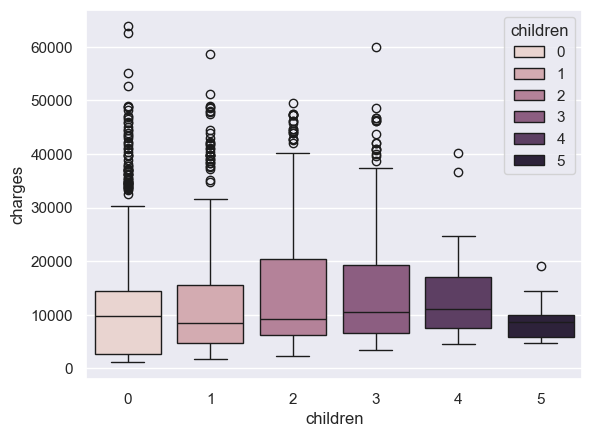

In [44]:
df=pd.read_csv('medical_cost.csv')
sns.boxplot(data=df,x='children',y='charges',hue='children')
plt.show()

#**interpretation Résultat obtenus :**

**Concernant le nombre d'enfants, les charges** moyennes et leur distribution (visibles sur le boxplot) **tendent à être plus élevées pour les individus ayant 1 ou 2 enfants par rapport à ceux n'en ayant pas**. **La relation n'est pas linéaire pour un nombre d'enfants plus élevé, avec une moyenne et une dispersion des charges notablement plus faibles pour les individus ayant 5 enfants**. Le boxplot révèle également **l'existence de charges exceptionnellement élevées (outliers) dans la plupart des groupes,** indépendamment du nombre d'enfants (sauf potentiellement pour 5 enfants).

**Quel est l’effet de l’indice de masse corporelle (IMC) sur les charges ?**

Text(0, 0.5, 'Charges')

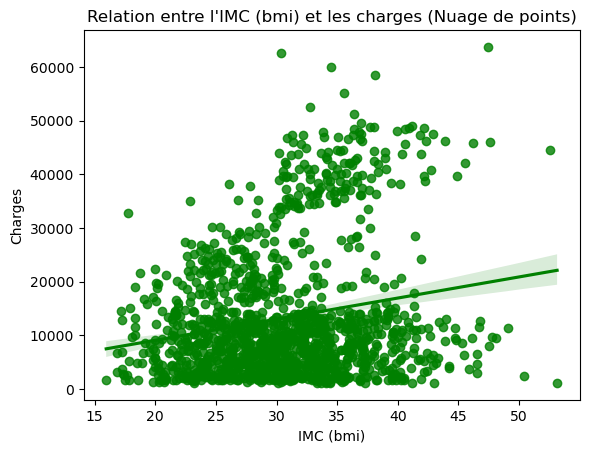

In [9]:
# Visualisation : nuage de points + droite de régression

df = pd.read_csv('medical_cost.csv')
sns.regplot(data=df, x='bmi', y='charges',color='green')
plt.title("Relation entre l'IMC (bmi) et les charges (Nuage de points)")
plt.xlabel("IMC (bmi)")
plt.ylabel("Charges")

In [12]:
df.describe()

,Id,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,669.500000,39.207025,30.663397,1.094918,13270.422265
std,386.391641,14.049960,6.098187,1.205493,12110.011237
min,1.000000,18.000000,15.960000,0.000000,1121.873900
25%,335.250000,27.000000,26.296250,0.000000,4740.287150
50%,669.500000,39.000000,30.400000,1.000000,9382.033000
75%,1003.750000,51.000000,34.693750,2.000000,16639.912515
max,1338.000000,64.000000,53.130000,5.000000,63770.428010


#**interpretation Résultat obtenus :**

En bref, l'analyse montre que **plus l'IMC est élevé, plus les charges ont tendance à être importantes.**
Il y a une relation positive. Cependant, l'IMC n'est pas le seul facteur ; d'autres éléments contribuent aussi à la variation des charges.

 **Les personnes obèses (IMC > 30) ont-elles des frais plus élevés ?**

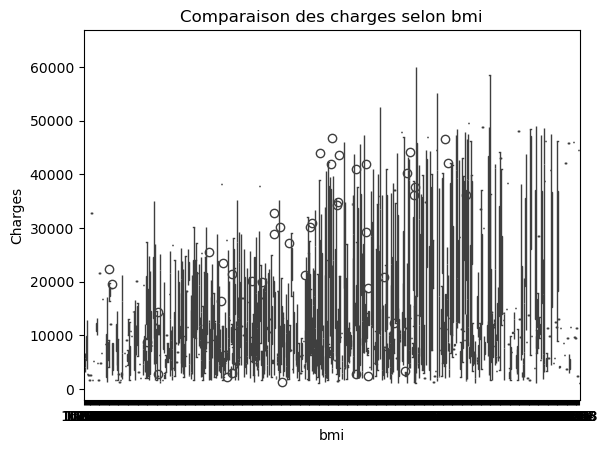

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(x='bmi', y='charges', data=df)
plt.title("Comparaison des charges selon bmi")
plt.xlabel("bmi")
plt.ylabel("Charges")

plt.show()

 **Quelles sont les variables les plus corrélées avec les charges ? (matrice de corrélation)**

In [21]:
df=pd.read_csv('medical_cost.csv')
df['sex']=df['sex'].replace(['female','male'],value=['0','1']).astype(int)
df['region']=df['region'].replace(['southeast', 'northwest', 'southwest', 'northeast'], [0, 1, 2, 3]).astype(int)
df['smoker']=df['smoker'].replace(['no','yes'],value=['0','1']).astype(int)
df.corr()

C:\Users\DataVault\AppData\Local\Temp\ipykernel_3528\345023031.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['region']=df['region'].replace(['southeast', 'northwest', 'southwest', 'northeast'], [0, 1, 2, 3]).astype(int)


,Id,age,sex,bmi,children,smoker,region,charges
Id,1.000000,-0.031467,0.003704,-0.036169,0.025221,0.005217,0.008248,-0.003373
age,-0.031467,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.010265,0.299008
sex,0.003704,-0.020856,1.000000,0.046371,0.017163,0.076185,-0.010170,0.057292
bmi,-0.036169,0.109272,0.046371,1.000000,0.012759,0.003750,-0.213489,0.198341
children,0.025221,0.042469,0.017163,0.012759,1.000000,0.007673,0.000107,0.067998
smoker,0.005217,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.038873,0.787251
region,0.008248,0.010265,-0.010170,-0.213489,0.000107,-0.038873,1.000000,-0.040728
charges,-0.003373,0.299008,0.057292,0.198341,0.067998,0.787251,-0.040728,1.000000


#**interpretation Résultat obtenus :**

VARIABLES LES PLUS CORRELEES AVEC LES CHARGES : **'smoker' (0.787, forte corrélation positive)** et 
**'age' (0.299, corrélation positive modérée)**<u>
Fumeurs et coûts : Oui, corrélation positive très forte (0.787), ils paient significativement plus.
.
**Nombre d'enfants et charges** : **Très faible corrélation positive** (**0.068**), donc **influence minime**.

**Sexe et charges** : **Très faible corrélation positive** (**0.057**), donc **influence très faible**.

**Région et charges** : Très faible corrélation négative (-0.041), l'impact direct est faible selon cet encodage numérique. Une analyse avec One-Hot Encoding serait plus informative.


**C'est un avertissement (FutureWarning), pas une erreur bloquante. Pandas vous prévient que la façon dont la fonction replace gère les types de données va changer dans les futures versions. Votre code fonctionne actuellement, mais il est recommandé de l'adapter pour qu'il continue de fonctionner correctement avec les versions futures de pandas.**

**Existe-t-il des outliers dans les charges ? Qui sont-ils ?**

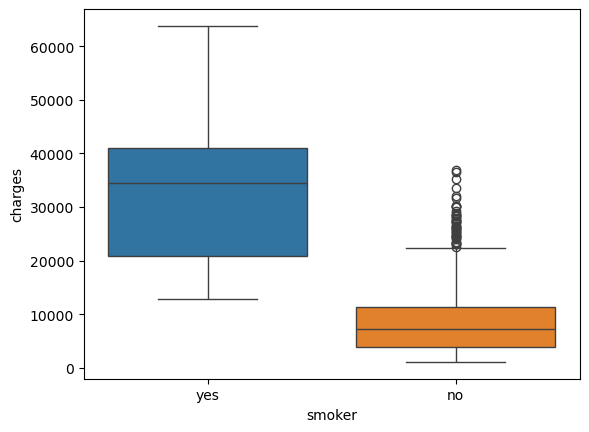

In [23]:
df=pd.read_csv('medical_cost.csv')
sns.boxplot(data=df,x='smoker',y='charges',hue='smoker')
plt.show()

#**interpretation Résultat obtenus :** **Ce que montre le graphique **

**<u>Oui, il existe des outliers (valeurs aberrantes) <u>**:

Chez les **non-fumeurs (no)**, on observe de **nombreux points au-dessus de la boîte : ce sont les outliers**.

Chez les **fumeurs (yes)**, les valeurs sont naturellement plus élevées, mais **peu de points isolés apparaissent**, car les charges sont globalement plus concentrées dans des valeurs élevées.

**Peut-on prédire les charges médicales avec un modèle de régression linéaire ?**

Text(0, 0.5, 'Charges')

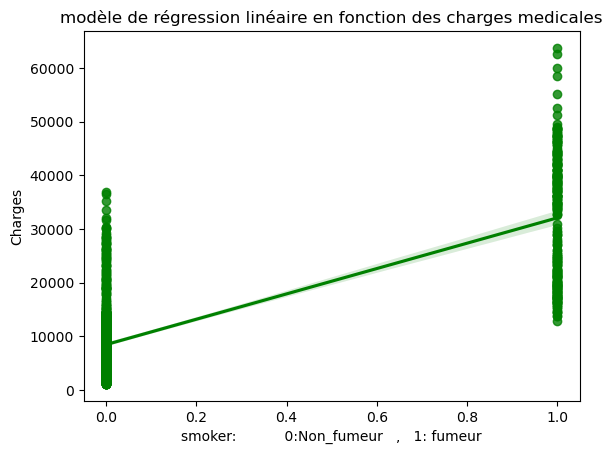

In [37]:
df = pd.read_csv('medical_cost.csv')
df['smoker']=df['smoker'].replace(['no','yes'],value=['0','1']).astype(int)
sns.regplot(data=df, x='smoker', y='charges',color='green')
plt.title("modèle de régression linéaire en fonction des charges medicales")
plt.xlabel("smoker:           0:Non_fumeur   ,   1: fumeur")
plt.ylabel("Charges")
plt.show()

#**interpretation Résultat obtenus :** **Ce que montre le graphique **

Pour une variable binaire (0 ou 1) sur l'axe X :

La droite de régression montre la moyenne des charges pour les non-fumeurs (là où X=0).
La pente de la droite représente la différence moyenne des charges entre les fumeurs (X=1) et les non-fumeurs (X=0). Une pente positive indique que les fumeurs ont des charges moyennes plus élevées.

**Le graphique montre clairement que les fumeurs (1) ont des charges médicales beaucoup plus élevées que les non-fumeurs (0). La droite de régression visualise cette forte augmentation des charges liée au tabagisme.**

**Quelle est la performance du modèle prédictif ? (R², RMSE)**

**Quels profils de patients génèrent les plus fortes charges ? (filtrage + visualisation)**

        Id  age     sex     bmi  children smoker     region      charges
543    544   54  female  47.410         0    yes  southeast  63770.42801
1300  1301   45    male  30.360         0    yes  southeast  62592.87309
1230  1231   52    male  34.485         3    yes  northwest  60021.39897
577    578   31  female  38.095         1    yes  northeast  58571.07448
819    820   33  female  35.530         0    yes  northwest  55135.40209
1146  1147   60    male  32.800         0    yes  southwest  52590.82939
34      35   28    male  36.400         1    yes  southwest  51194.55914
1241  1242   64    male  36.960         2    yes  southeast  49577.66240
1062  1063   59    male  41.140         1    yes  southeast  48970.24760
488    489   44  female  38.060         0    yes  southeast  48885.13561
175    176   63  female  37.700         0    yes  southwest  48824.45000
530    531   57    male  42.130         1    yes  southeast  48675.51770
901    902   60    male  40.920         0    yes  s

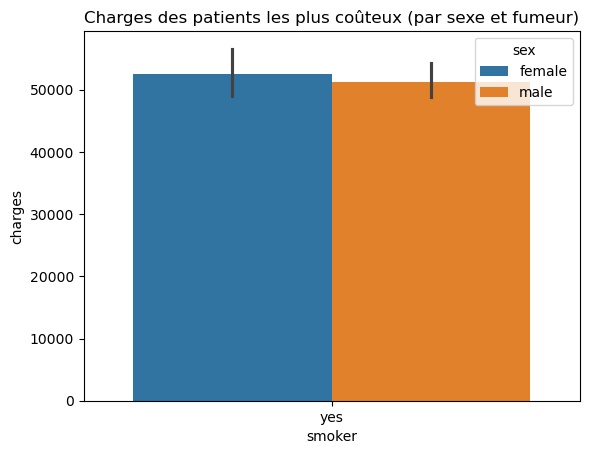

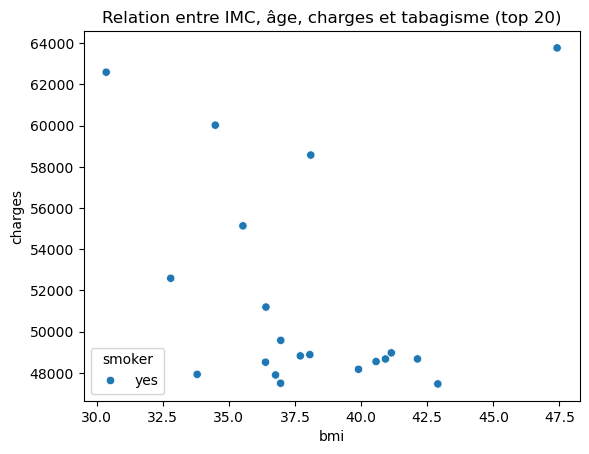

In [43]:
df = pd.read_csv('medical_cost.csv')
top_charges = df.sort_values(by='charges', ascending=False).head(20)
print(top_charges)

sns.barplot(data=top_charges, x='smoker', y='charges', hue='sex')
plt.title("Charges des patients les plus coûteux (par sexe et fumeur)")
plt.show()

sns.scatterplot(data=top_charges, x='bmi', y='charges', hue='smoker')
plt.title("Relation entre IMC, âge, charges et tabagisme (top 20)")
plt.show()

#**interpretation Résultat obtenus :** **Ce que montre le graphique **

<u>**Les patients qui génèrent les charges les plus élevées sont principalement des fumeurs. Ils ont aussi souvent un IMC élevé. Le sexe ne semble pas être un facteur clé parmi ces patients les plus coûteux.**<u>